# Praca domowa 6

## Zadanie 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [45]:
df.loc[(df.waterfront == 1) & (df.grade >= df.grade.median()),"price"].mean().round(2)

1784151.7

Odp: 1784151.70 USD

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [51]:
df.loc[df.floors == 2,"bathrooms"].median() > df.loc[df.floors == 3, "bathrooms"].median()

False

Odp: Nie jest prawdą, że nieruchomości o 2 piętrach mają większą liczbę łazienek niż nieruchomości o 3 piętrach

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [110]:
halfLat = (df.lat.max()+df.lat.min())/2
halfLat

47.466750000000005

In [112]:
df.loc[df.lat > halfLat].groupby("waterfront").grade.describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,16198.0,7.719965,1.217724,1.0,7.0,8.0,8.0,13.0
1,115.0,9.139130,1.695644,5.0,8.0,9.0,10.0,12.0


Odp: Jeśli nie ma widoku na morze, to wartość kwartyla 0.25 jakości wykończenia nieruchomości położonych na północy jest 7, a kwartyla 0.75 wynosi 8. Jeśli jest z widokiem na morze to kwartyl 0.25 - 8, a kwartyl 0.75 - 10.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

Tutaj zakładam, że linia rozgraniczająca północ i południe jest umiejsciowiona na szerokości geograficznej, która jest średnią arytmetyczną szerokości geograficznej nieruchomości najbardziej odstających na południe i północ. Analogicznie postąpiłem ze wschodem i zachodem

In [93]:
df.groupby("zipcode").id.agg("count").sort_values(ascending = False).head(1)

zipcode
98103    602
Name: id, dtype: int64

In [74]:
q3, q1 = np.percentile(df.loc[df.zipcode == 98103, "price"],[75,25])

In [76]:
q3 - q1

262875.0

Odp: Pod kodem 98103 jest położonych najwięcej nieruchomości. Rozstęp międzykwartylowy dla ceny nieruchomości położonych pod tym adresem wynosi 262875 USD

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [100]:
# zakładam, że liczę nie dla dzialki, a dla mieszkań
(df.loc[df.sqft_living15 > df.sqft_living].id.count()/df.id.count()*100).round(2)

42.59

Odp: Jest to w zaokrągleniu 42.59 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [113]:
halfLong = (df.long.max()+df.long.min())/2

In [127]:
# północny zachód:
NW = df.loc[(df.long < halfLong) & (df.lat > halfLat)].id.count()
SE = df.loc[(df.long > halfLong) & (df.lat < halfLat)].id.count()
(abs(NW - SE) / SE * 100).round(2)

18343.53

Odp: O 18343.53 % w przybliżeniu.

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

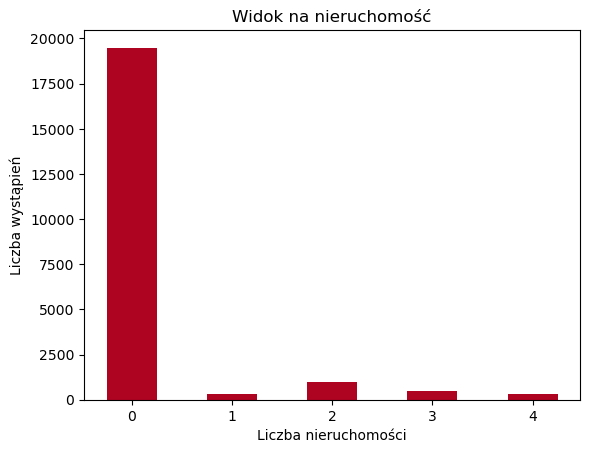

In [44]:
plt.hist(df.view,9,histtype = "stepfilled", range = (-0.25,4.25), color = "#af0322")
plt.title("Widok na nieruchomość")
plt.xlabel("Liczba nieruchomości")
plt.ylabel("Liczba wystąpień")
plt.show()

b)

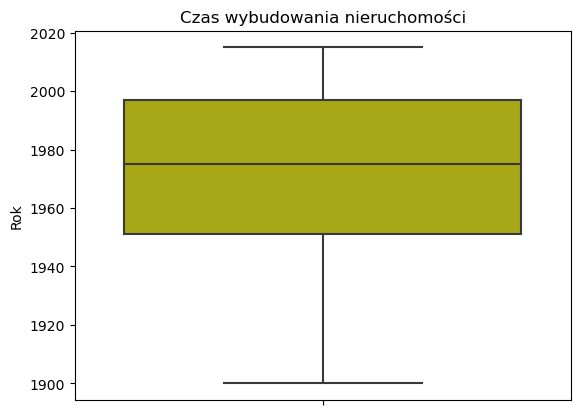

In [28]:
sns.boxplot(df.yr_built, color='y')
plt.title("Czas wybudowania nieruchomości")
plt.xticks([0], [""])
plt.ylabel("Rok")
plt.show()

c)

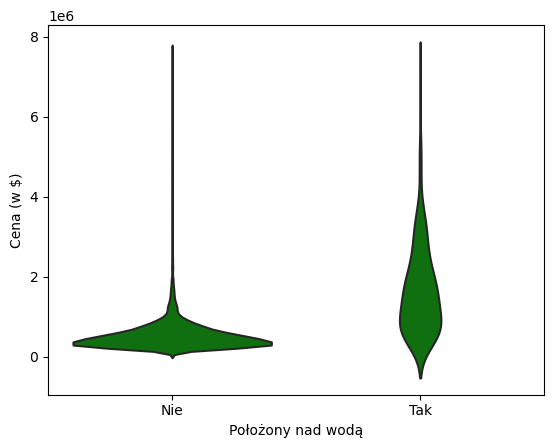

In [16]:
labels = ["Nie", "Tak"]
previous = [0,1]
sns.violinplot(x = "waterfront", y = "price", data=df, inner = None, color = "green")
plt.xlabel("Położony nad wodą")
plt.ylabel("Cena (w $)")
plt.xticks(previous, labels)
plt.show()